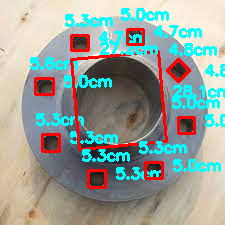

In [38]:
#code 1
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

# Function to show array of images (intermediate results)                       ##Taken the code from https://github.com/snsharma1311/object-size/blob/master/init.py
def show_images(images):
	for i, img in enumerate(images):
		cv2_imshow(img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

img_path = "/content/images_top3.jpg"

# Read image and preprocess
image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

#show_images([blur, edged])

# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) >100]

#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

#show_images([image, edged])
#print(len(cnts))

# Reference object dimensions
# Here for reference I have used a 2cm x 2cm square
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr)
dist_in_cm = 5.6
pixel_per_cm = dist_in_pixel/dist_in_cm

# Draw remaining contours
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
	wid = euclidean(tl, tr)/pixel_per_cm
	ht = euclidean(tr, br)/pixel_per_cm
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

show_images([image])

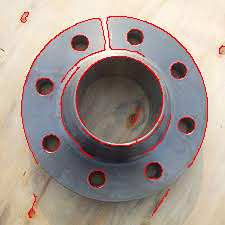

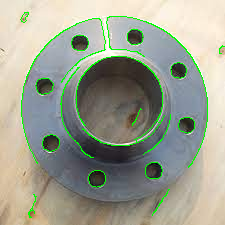

4.977777777777778
5.6


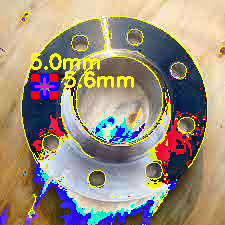

5.288888888888889
5.288888888888889


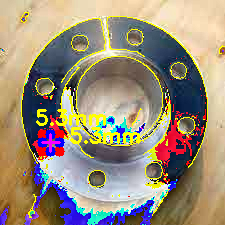

4.666666666666666
5.288888888888889


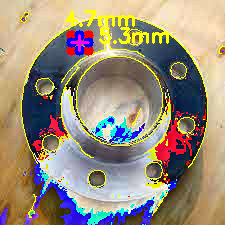

28.11039963965711
27.18085746156068


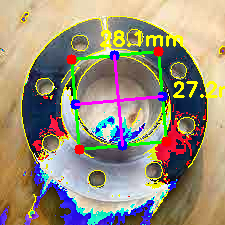

5.288888888888889
5.288888888888889


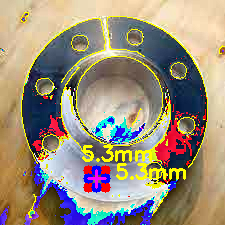

4.666666666666666
4.977777777777778


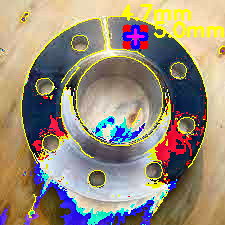

4.977777777777778
5.288888888888889


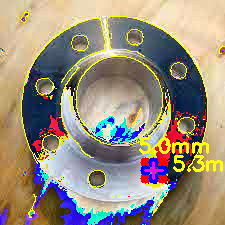

4.839753080121258
4.839753080121258


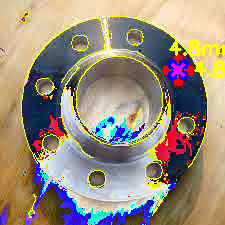

4.977777777777778
4.977777777777778


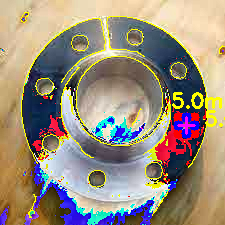

4.977777777777778
5.6


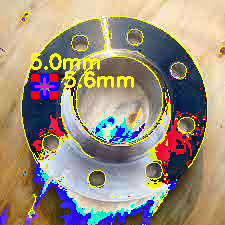

5.288888888888889
5.288888888888889


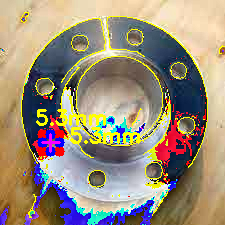

4.666666666666666
5.288888888888889


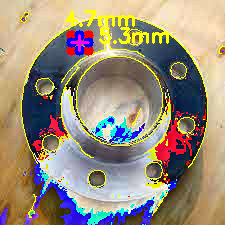

28.11039963965711
27.18085746156068


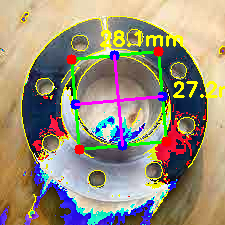

5.288888888888889
5.288888888888889


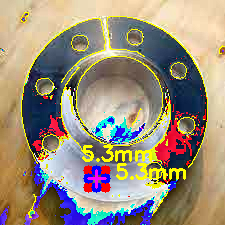

4.666666666666666
4.977777777777778


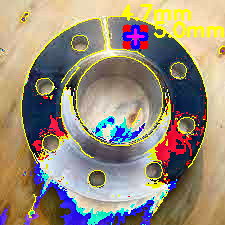

4.977777777777778
5.288888888888889


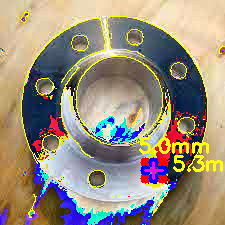

4.839753080121258
4.839753080121258


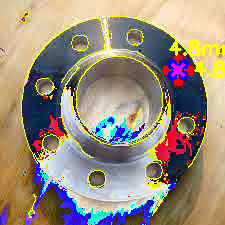

4.977777777777778
4.977777777777778


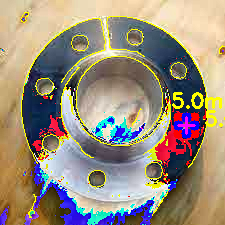

In [37]:
#code 2

from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

def midpoint(ptA, ptB):                                                         ##  CODE TAKEN FROM https://stackoverflow.com/questions/66338814/measuring-the-width-of-several-points-in-a-mask-image-based-on-another-mask-imag
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
# Read image
mask2 = cv2.imread('images_top3.jpg')
mask4 = cv2.imread('images_top3.jpg')
#cv2_imshow(mask2)
cv2.waitKey(0)

########### Mask 2 - Oject
gray = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9,9), 0)

# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

# find contours in the edge map
cnts_1 = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts_1 = imutils.grab_contours(cnts_1)

# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts_1, _) = contours.sort_contours(cnts_1)
pixelsPerMetric = None
contorno=cv2.drawContours(mask2,cnts_1, -1, (0, 0, 255), 1)
cv2_imshow(contorno)
cv2.waitKey()

##### Mask 4 - EGS
gray = cv2.cvtColor(mask4, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9,9), 0)
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
# find contours in the edge map
cnts_2 = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts_2 = imutils.grab_contours(cnts_2)
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts_2, _) = contours.sort_contours(cnts_2)
pixelsPerMetric = None
contorno2=cv2.drawContours(mask4,cnts_2, -1, (0, 255, 0), 1)
cv2_imshow(mask4)
cv2.waitKey()

###### Total Contourn
cnts=(cnts_1 + cnts_2)

# loop over the contours individually
for c in cnts:
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
        continue
    # compute the rotated bounding box of the contour
    orig = (mask2 + mask4)
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

        # unpack the ordered bounding box, then compute the midpoint
        # between the top-left and top-right coordinates, followed by
        # the midpoint between bottom-left and bottom-right coordinates
        (tl, tr, br, bl) = box
        (tltrX, tltrY) = midpoint(tl, tr)
        (blbrX, blbrY) = midpoint(bl, br)
        # compute the midpoint between the top-left and top-right points,
        # followed by the midpoint between the top-righ and bottom-right
        (tlblX, tlblY) = midpoint(tl, bl)
        (trbrX, trbrY) = midpoint(tr, br)
        # draw the midpoints on the image
        cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
        # draw lines between the midpoints
        cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
                 (255, 0, 255), 2)
        cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
                 (255, 0, 255), 2)
# compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
    # (in this case, mm)
    if pixelsPerMetric is None:
        pixelsPerMetric = dB / 5.6

# compute the size of the object
    dimA = dA / pixelsPerMetric
    print(dimA)
    dimB = dB / pixelsPerMetric
    print(dimB)
    # draw the object sizes on the image
    cv2.putText(orig, "{:.1f}mm".format(dimA),
        (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (0, 255, 255), 2)
    cv2.putText(orig, "{:.1f}mm".format(dimB),
        (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (0, 255, 255), 2)
    # show the output image
    cv2_imshow(orig)
    cv2.waitKey(0)

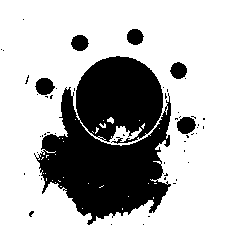

True

In [34]:
# Creating the binary mask image


import cv2
from google.colab.patches import cv2_imshow

# Load the JPG image                                                            #code taken from chatgpt
image = cv2.imread('images_top3.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask image
_, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Display the binary mask image
cv2_imshow(binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the binary mask image
cv2.imwrite('binary_mask.png', binary_mask)


Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 2 pixels
Height in cm: 0.0529166666 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 2 pixels
Height in cm: 0.0529166666 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 2 pixels
Width in cm: 0.0529166666 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 5 pixels
Width in cm: 0.13229166650000002 cm
Height: 3 pixels
Height in cm: 0.0793749999 cm
Width: 3 pixels
Width in cm: 0.0793749999 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 1 pixels
Width in cm: 0.0264583333 cm
Height: 1 pixels
Height in cm: 0.0264583333 cm
Width: 3 pixels
Width in cm: 0.0793749999 cm
Height: 2 pixels
Height in c

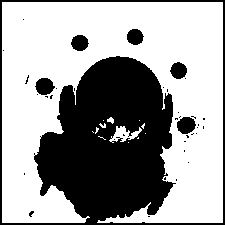

In [35]:
#Dimention calculation in the masked image


import cv2

# Load the binary mask image
mask_image = cv2.imread('binary_mask.png', 0)                                   #code taken from chatgpt

# Find contours in the mask image
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Measure dimensions of contours
for contour in contours:
    # Calculate contour dimensions
    x, y, width, height = cv2.boundingRect(contour)
    #perimeter = cv2.arcLength(contour, True)

    # Display the measured dimensions
    print(f"Width: {width} pixels")
    print(f"Width in cm: {width*0.0264583333} cm")
    print(f"Height: {height} pixels")
    print(f"Height in cm: {height*0.0264583333} cm")
    

    # Draw the contour and bounding box on the image (optional)
    cv2.drawContours(mask_image, [contour], 0, (0, 255, 0), 2)
    cv2.rectangle(mask_image, (x, y), (x + width, y + height), (0, 0, 255), 2)

# Display the image with contours (optional)
cv2_imshow(mask_image)
cv2.waitKey(0)
cv2.destroyAllWindows()